In [1]:
# root directory
root_path = f"../../../../"

In [2]:
import pandas as pd

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_extended_polarity.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(7302, 67)


,mx,inchikey_additive,inchikey_solvent,label,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,heavy_atom_count_additive,isotope_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,chloroform,dodecylphosphonic acid,False,False,True
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,oxolane,dodecylphosphonic acid,False,False,True
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,propan-2-one,dodecylphosphonic acid,False,False,True
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,acetonitrile,dodecylphosphonic acid,False,False,True
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,KFZMGEQAYNKOFK-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,propan-2-ol,dodecylphosphonic acid,False,False,True


In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [6]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [7]:
df_mx_solvent_data_labeled.head()

,mx,inchikey_additive,inchikey_solvent,label,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,chloroform,dodecylphosphonic acid,0,0,1
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,oxolane,dodecylphosphonic acid,0,0,1
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,propan-2-one,dodecylphosphonic acid,0,0,1
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,acetonitrile,dodecylphosphonic acid,0,0,1
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,KFZMGEQAYNKOFK-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,propan-2-ol,dodecylphosphonic acid,0,0,1


In [8]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'inchikey_additive', 'inchikey_solvent', 'label',
       'work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'p_solvent', 'x_e_solvent', 'x_d_solvent',
       'x_n_solvent', 'boiling_point_solvent', 'molecular_weight_additive',
       'xlogp_additive', 'tpsa_additive', 'complexity_additive',
       'h_bond_donor_count_additive', 'h_bond_acceptor_count_additive',
       'rotatable_bond_count_additive', 'heavy_atom_count_additive',
       'atom_stere

In [9]:
features = ['work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'p_solvent', 'x_e_solvent', 'x_d_solvent',
       'x_n_solvent', 'boiling_point_solvent',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_additive', 'h_bond_donor_count_additive',
       'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
       'heavy_atom_count_additive', 'atom_stereo_count_additive',
       'bond_stereo_count_additive', 'covalent_unit_count_additive', 'method_hf', 'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,h_bond_donor_count_additive,h_bond_acceptor_count_additive,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

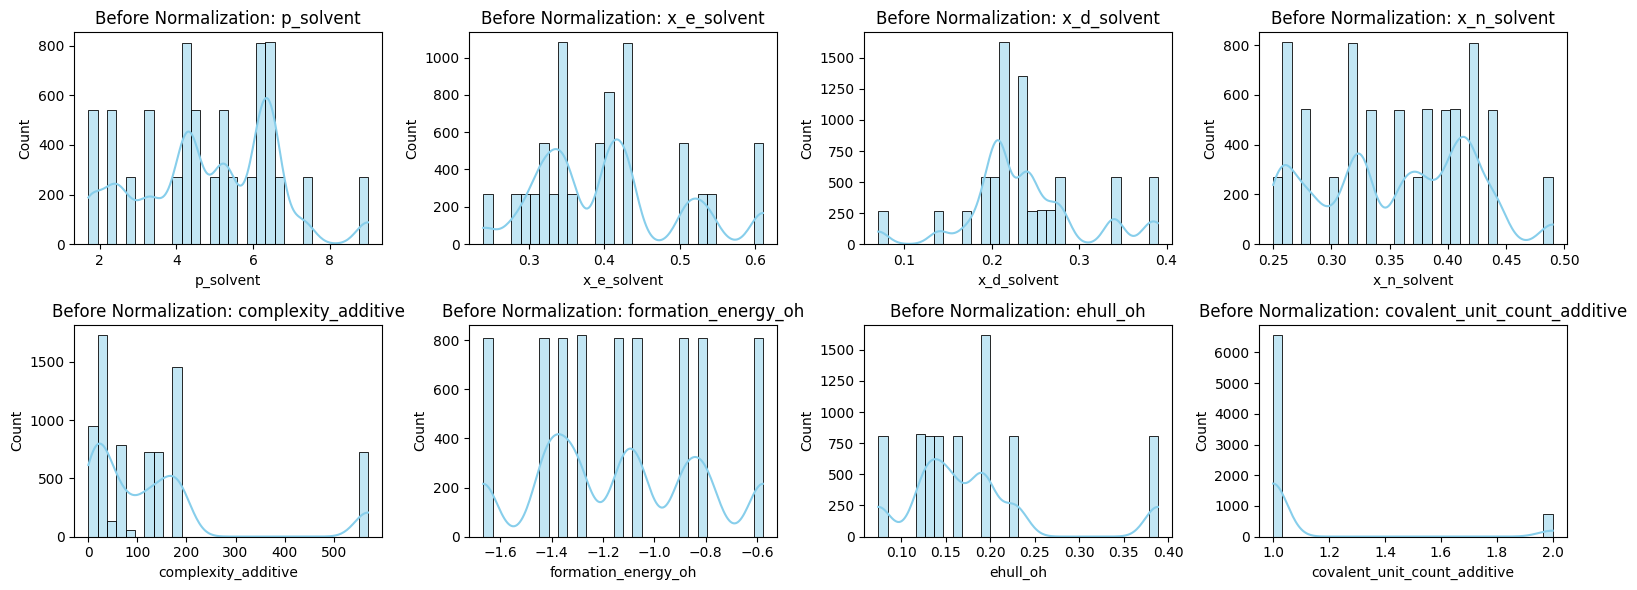

In [14]:
plot_feature = ['p_solvent', 'x_e_solvent', 'x_d_solvent',
       'x_n_solvent', 'complexity_additive',
   'formation_energy_oh','ehull_oh', 'covalent_unit_count_additive'
   ]
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

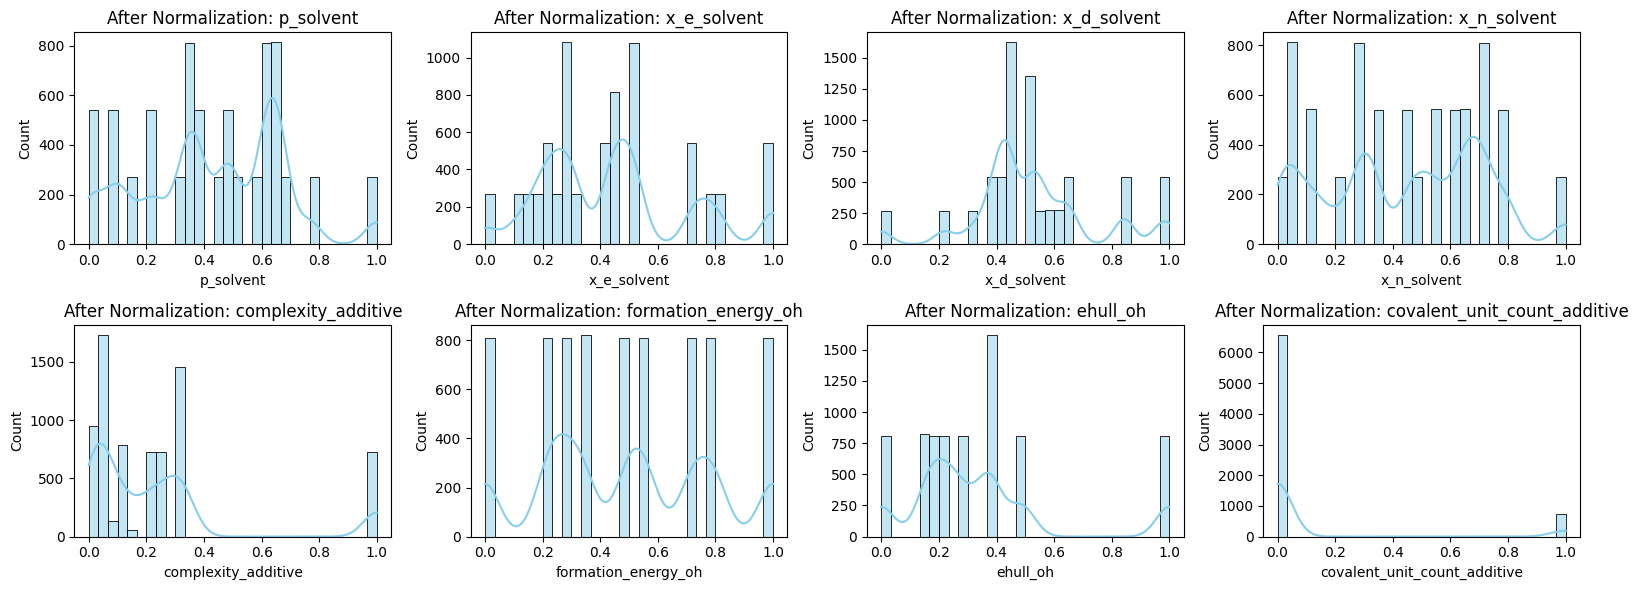

In [17]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [18]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [20]:
from sklearn.impute import KNNImputer

In [21]:
# impute missing data entries using K nearest neighbors
imputer = KNNImputer()
X_impute = imputer.fit_transform(X_scaled)

In [22]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_impute)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


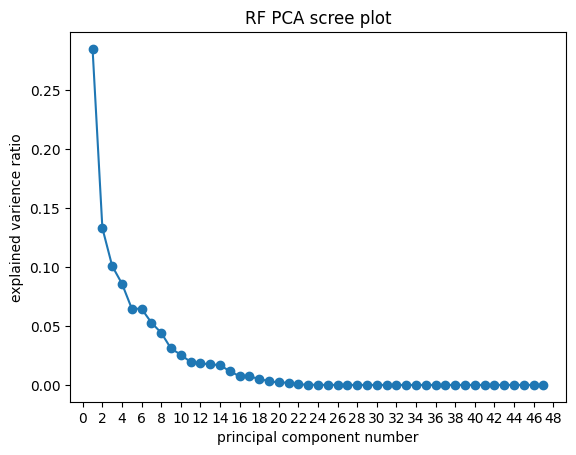

In [24]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('RF PCA scree plot')
plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [60]:
pca = PCA(n_components=23, random_state=42)
X_pca = pca.fit_transform(X_impute)

In [61]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [62]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [63]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [64]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

92
24
92
24


In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

In [66]:
param_dist = {
    'estimator__max_depth': randint(3, 10),
    'estimator__n_estimators': randint(50, 200),
    'estimator__max_features':  ['sqrt', 'log2', None],
    'estimator__min_samples_split': randint(2, 10),
    'estimator__max_leaf_nodes': randint(3, 10)
}

In [67]:
base_rf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_rf, random_state=42)

In [68]:
rand_search = RandomizedSearchCV(bagging_clf, param_dist, cv=5, n_jobs=1, scoring='accuracy', verbose=2)
rand_search.fit(X_train_train, y_train_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END estimator__max_depth=8, estimator__max_features=log2, estimator__max_leaf_nodes=4, estimator__min_samples_split=8, estimator__n_estimators=95; total time=   1.3s
[CV] END estimator__max_depth=8, estimator__max_features=log2, estimator__max_leaf_nodes=4, estimator__min_samples_split=8, estimator__n_estimators=95; total time=   1.4s
[CV] END estimator__max_depth=8, estimator__max_features=log2, estimator__max_leaf_nodes=4, estimator__min_samples_split=8, estimator__n_estimators=95; total time=   1.2s
[CV] END estimator__max_depth=8, estimator__max_features=log2, estimator__max_leaf_nodes=4, estimator__min_samples_split=8, estimator__n_estimators=95; total time=   1.2s
[CV] END estimator__max_depth=8, estimator__max_features=log2, estimator__max_leaf_nodes=4, estimator__min_samples_split=8, estimator__n_estimators=95; total time=   1.2s
[CV] END estimator__max_depth=4, estimator__max_features=log2, estimator__max_leaf_n

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'estimator__max_depth': <scipy.stats....0020708321B70>, 'estimator__max_features': ['sqrt', 'log2', ...], 'estimator__max_leaf_nodes': <scipy.stats....00207083D62D0>, 'estimator__min_samples_split': <scipy.stats....002070822FAD0>, ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [69]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                   max_features=None,
                                                   max_leaf_nodes=7,
                                                   min_samples_split=3,
                                                   n_estimators=108,
                                                   random_state=42),
                  random_state=42)


In [70]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.9741379310344828
Val Accuracy: 0.9583333333333334
Validation Report:
               precision    recall  f1-score   support

          -1       1.00      0.83      0.91         6
           1       0.95      1.00      0.97        18

    accuracy                           0.96        24
   macro avg       0.97      0.92      0.94        24
weighted avg       0.96      0.96      0.96        24



In [71]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

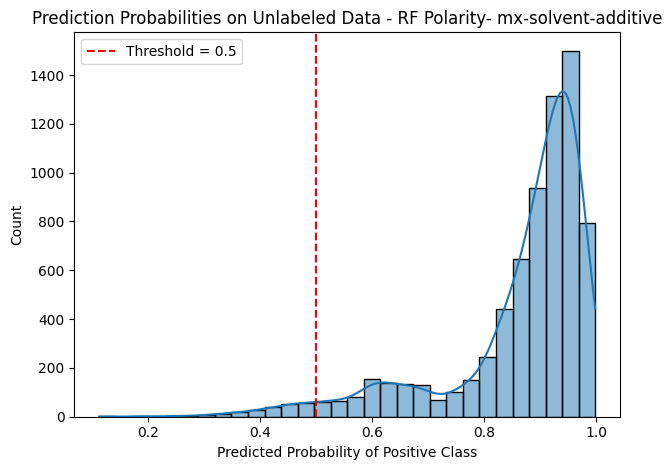

In [72]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - RF Polarity- mx-solvent-additive")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] == high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent the same as additive")
print(top_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])


solvent the same as additive
        mx                   solvent  predicted_proba  method_lif/hcl  \
323   V2C1     methylsulfinylmethane         0.989352               1   
348   V2C1  1-methylpyrrolidin-2-one         0.986111               0   
191  Ti2C1     methylsulfinylmethane         0.986023               0   
670   V4C3     methylsulfinylmethane         0.985185               0   
354   V2C1         N-methylformamide         0.984799               0   
427  Mo2C1                   ethanol         0.984171               0   
328   V2C1         N-methylformamide         0.983873               1   
270  Nb2C1     methylsulfinylmethane         0.983245               0   
644   V4C3     methylsulfinylmethane         0.982870               1   
317   V2C1               propan-2-ol         0.982485               1   
643   V4C3  1-methylpyrrolidin-2-one         0.981019               1   
668   V4C3                   ethanol         0.980787               0   
675   V4C3         N-m

In [74]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] != high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent different than additive")
print(top_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
         mx                   solvent  \
2941   V2C1                   oxolane   
3184   V2C1                   oxolane   
6200   V4C3     N,N-dimethylformamide   
1224  Ti3C2                  pyridine   
1099  Ti3C2  1-methylpyrrolidin-2-one   
1083  Ti3C2                   ethanol   
1092  Ti3C2                  methanol   
1060  Ti3C2             ethyl acetate   
1934  Ti2C1                  pyridine   
1548  Ti2C1                   ethanol   
1935  Ti2C1                  pyridine   
1808  Ti2C1  1-methylpyrrolidin-2-one   
1736  Ti2C1              propan-2-one   
2420  Nb2C1                  pyridine   
2421  Nb2C1                  pyridine   
2429  Nb2C1             cyclohexanone   
2402  Nb2C1               propan-1-ol   
2294  Nb2C1  1-methylpyrrolidin-2-one   
2222  Nb2C1              propan-2-one   
2466  Nb2C1              propan-2-one   

                                               additive  predicted_proba  \
2941                          

In [75]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] == low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent the same as additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent the same as additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
        mx             solvent  predicted_proba  method_lif/hcl  \
153  Ti3C2       chlorobenzene         0.112654               0   
138  Ti3C2     dichloromethane         0.182674               0   
148  Ti3C2  tetrachloromethane         0.185988               0   
120  Ti3C2     dichloromethane         0.200828               0   
132  Ti3C2       chlorobenzene         0.237809               0   
134  Ti3C2        propan-2-one         0.245668               0   
632  Zr3C2       chlorobenzene         0.256420               0   
121  Ti3C2          1,4-xylene         0.265123               0   
621  Zr3C2          1,4-xylene         0.271693               0   
620  Zr3C2             toluene         0.273545               0   
579  Zr3C2       chlorobenzene         0.288210               1   
567  Zr3C2             toluene         0.298236               1   
133  Ti3C2             oxolane         0

In [76]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] != low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent different than additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
Empty DataFrame
Columns: [mx, solvent, additive, predicted_proba, method_lif/hcl, method_licl/hf, method_hf]
Index: []


In [77]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    7186.000000
mean        0.862447
std         0.134104
min         0.112654
25%         0.839409
50%         0.910183
75%         0.949233
max         0.998148
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)             0
Low (0.1–0.3)              13
Mid (0.3–0.5)             216
High (0.5–0.7)            749
Very High (0.7–0.9)      2271
Extremely High (>0.9)    3937
Name: count, dtype: int64


In [78]:
df_unlabeled.to_csv(f"001_p_vs_n_predictions_unlabeled_polarity_rf-normalize-fintune-pca-mxsolvadd.csv")
df_unlabeled.to_pickle(f"001_p_vs_n_predictions_unlabeled_polarity_rf-normalize-fintune-pca-mxsolvadd.pkl")
